In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Context: Can you differentiate a weed from a crop seedling?

Objective: To implement the techniques learnt as a part of the course.


 use  the  dataset  path  in  the  Google  Colab  notebook  to  do  further  steps  related  to  project  problem statement.
You can set runtime type to “GPU” in Google Colab

Steps and tasks:
1.Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2.Data Pre-processing: (15 Marks)a.Normalization. b.Gaussian Blurring. c.Visualize data after pre-processing.
3.Make data compatible: (10 Marks) a.Convert labels to one-hot-vectors. b.Print the label for y_train[0] .c.Split the dataset into training,testing, and validation set.(Hint: First split images andlabels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5) d.Check  the  shape  of  data, Reshape  data  into  shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
4.Building CNN: (15 Marks) a.Define layers. b.Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
5.Fit and evaluate model and print confusion matrix. (10 Marks)
6.Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)
Note: The data provided to you on Olympus has only train images and their labels. For our purpose we use this for our training and testing and validation purpose.


In [8]:
# Step 1
# Import necessary modules.

import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

In [11]:
data = pd.read_csv('/Labels.csv')    # Load the dataset by providing the path to the file.

In [12]:
data.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [13]:
# Print the shape of data.
data.shape


(4750, 1)

In [14]:
y = data["Label"]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

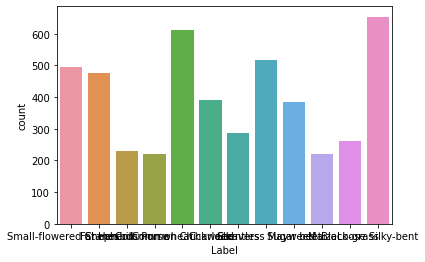

In [15]:
#Visualie the images in the dataset.
g = sns.countplot(y)
y.value_counts()

In [ ]:
dataset = np.load('/images.npy')

In [ ]:
dataset.reshape((4750,128,-1))

In [ ]:
dataset.shape

In [ ]:
X = dataset # Convert the features (pixel values) to numpy array to feed into the supervised learning model.
y = y.values # Convert the labels to numpy array to feed into the supervised learning model.

In [ ]:
X.shape

In [ ]:
# Split data into test and train to build the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [ ]:
type(X_train) # As we can see that the data to be fed into model is of the type numpy array.

In [ ]:
i = 0
image = X_train[i]
label = y_train[i][0]
plt.imshow(image);

In [ ]:
sobel = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel)

In [ ]:
# Step 2

In [ ]:
# Normalize the data
X = X.astype('float32') / 255.0

In [ ]:
print(len(X)) # Check the number of rows in the dataset.
print(X.shape) 

In [ ]:
new_x = np.empty((4750, 128, 128)) 

In [ ]:
X.shape

In [ ]:
# Gaussian blurring
X_new = np.apply_along_axis(
    lambda img: cv2.GaussianBlur(img, (5, 5), 0), 
    -1, 
    X.reshape((-1, 128, 128))
)
X_new = X_new.reshape((-1, 128, 128))
plt.imshow(X_new[3], cmap='gray')

In [ ]:
# Visualize the data
df = pd.DataFrame({'A' : np.random.randn(8),
                   'B' : np.random.randn(8),
                   'C' : np.random.randn(8)})
df

In [ ]:
df.apply(lambda row: row.mean(), axis=1)

In [ ]:
# Now we create another empty numpy array of 4750 rows and 16384 columns shape, to store the pixel values, which are obtained by applying the Gaussian Blur.
# The new array is necessary as we have to feed the data in the model in this original format.
another_x = np.empty((4750, 16384))

In [ ]:
# Append/Set the values of the another array to be fed into model equal to the flattened array, which has the shape of 784 pixels (1-D)
for idx, img in enumerate(new_x):
  another_x[idx] = img.flatten()

In [ ]:
plt.hist(another_x[1])

In [ ]:
# Step 3 

In [ ]:
# Convert labels to one hot vectors

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

In [ ]:
print(y_train.shape)
print(y_test.shape)

In [ ]:
# Print y_train[0]
y_train[0]

In [ ]:
# Split the dataset into training,testing, and validation set.(Hint: First split images andlabels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

# Print the shape of the data. It is in the proper shape.  
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Step 4
# 4.Building CNN: (15 Marks) 

<h1>Create the Model:<h1/>

- Convolutional input layer, 32 feature maps with a size of 5×5 and a rectifier activation function.
- Batch Normalization Layer.
- Convolutional layer, 32 feature maps with a size of 5×5 and a rectifier activation function.
- Batch Normalization layer.
- Max Pool layer with size 2×2.
- Dropout layer at 25%.
---
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Dropout layer at 25%.
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Max Pool layer with size 2×2.
- Dropout layer at 25%.
---
- GlobalMaxPooling2D layer.
- Fully connected layer with 256 units and a rectifier activation function.
- Dropout layer at 50%.
- Fully connected output layer with 10 units and a softmax activation function.

In [ ]:
# Set the CNN model
# Define layers
batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

# Number of parameters in the CNN layers:

- ## Number of Parameters of a Conv Layer:
In a CNN, each layer has two kinds of parameters : weights and biases. The total number of parameters is just the sum of all weights and biases.

  Let’s define,

  - W_c = Number of weights of the Conv Layer.
  - B_c = Number of biases of the Conv Layer.
  - P_c = Number of parameters of the Conv Layer.
  - K = Size (width) of kernels used in the Conv Layer.
  - N = Number of kernels.
  - C = Number of channels of the input image.

    W<sub>c</sub> = K<sup>2</sup> x C x N
    
    B<sub>c</sub> = N

    P<sub>c</sub> = W<sub>c</sub> + B<sub>c</sub>


  So, we will use this formulae for our parameter calculation of first layer:
    
    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=x_train.shape[1:]))

  So the number of parameters is given by:

  Number of weights = W<sub>c</sub> = 5<sup>2</sup> x 3 x 32 = 2400

  Number of biases = B<sub>c</sub> = 32

  Total number of parameters for this layer = P<sub>c</sub> = 2400 + 32 = 2432


  We can verify this number by looking at the model summary.

    conv2d (Conv2D)              (None, 32, 32, 32)        2432

- ## Number of Parameters of a MaxPool Layer:
There are no parameters associated with a MaxPool layer. The pool size, stride, and padding are hyperparameters.

- ## Number of Parameters of a Fully Connected (FC) Layer:
There are two kinds of fully connected layers in a CNN. The first FC layer is connected to the last Conv Layer, while later FC layers are connected to other FC layers. Let’s consider each case separately.

  - ### Case 1: Number of Parameters of a Fully Connected (FC) Layer connected to a Conv Layer:
  Let’s define,

    W_{cf} = Number of weights of a FC Layer which is connected to a Conv Layer.

    B_{cf} = Number of biases of a FC Layer which is connected to a Conv Layer.
    
    O = Size (width) of the output image of the previous Conv Layer.
    
    N = Number of kernels in the previous Conv Layer.
    
    F = Number of neurons in the FC Layer.

      - W<sub>cf</sub> = O<sup>2</sup> x N x F
    
      - B<sub>cf</sub> = F

      - P<sub>cf</sub> = W<sub>cf</sub> + B<sub>cf</sub>

    Example: The first fully connected layer of our model is connected to a Conv Layer. For this layer, O = 1 (the width and height of image after global maxpooling), N = 64 and F = 256. Therefore,

      - Number of weights = W<sub>cf</sub> = 1<sup>2</sup> x 64 x 256 = 16384

      - Number of biases = B<sub>c</sub> = 256

      - Total number of parameters for this layer = P<sub>c</sub> = 16384 + 256 = 16640

    We can verify this number by looking at the model summary.
      
            dense (Dense)                (None, 256)               16640 

  - ### Case 2: Number of Parameters of a Fully Connected (FC) Layer connected to a FC Layer
  Let’s define,

    W<sub>ff</sub> = Number of weights of a FC Layer which is connected to an FC Layer.

    B<sub>ff</sub> = Number of biases of a FC Layer which is connected to an FC Layer.
    
    P<sub>ff</sub> = Number of parameters of a FC Layer which is connected to an FC Layer.
    
    F = Number of neurons in the FC Layer.
    
    F<sub>-1</sub> = Number of neurons in the previous FC Layer.

      - W<sub>ff</sub> = F<sub>-1</sub> x F

      - B<sub>ff</sub> = F

      - P<sub>ff</sub> = W<sub>ff</sub> + B<sub>ff</sub>

    In the above equation, **F<sub>-1</sub> x F** is the total number of connection weights from neurons of the previous FC Layer the neurons of the current FC Layer. The total number of biases is the same as the number of neurons (F).

    Example: The last fully connected layer of AlexNet is connected to an FC Layer. For this layer, **F<sub>-1</sub>** = 256 and **F** = 10. Therefore,

      - Number of weights = W<sub>cf</sub> = 256 x 10 = 2560

      - Number of biases = B<sub>c</sub> = 10

      - Total number of parameters for this layer = P<sub>c</sub> = 2560 + 10 = 2570

    We can verify this number by looking at the model summary.
      
            dense_1 (Dense)              (None, 10)                2570

In [ ]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [ ]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
# Network structure is summarized which confirms our design was implemented correctly.
model.summary()

In [ ]:
X_train = X_train.astype('float32') # Conversion to float type from integer type.
X_test = X_test.astype('float32')
X_train /= 255.0 # Division by 255
X_test /= 255.0

In [ ]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

print(X_train.shape)
print(X_test.shape)

In [ ]:
#Step 5.Fit and evaluate model and print confusion matrix. (10 Marks)

In [ ]:
# Set the batch size, number of epochs.
batch_size = 30
num_classes = 12
epochs = 40
num_predictions = 20

In [ ]:
# Fit the model 
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# Score trained model
scores = model.evaluate(X_train, y_train, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Confusion Matrix
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred=)
print(cm)

In [ ]:
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                     columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

In [ ]:
print("=== Classification Report ===")
print(classification_report(X_test, y_test))

In [ ]:
#Step 6.Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. 

In [ ]:
i = 0
image = X_test[2]
label = y_test[i][0]
plt.imshow(image);

In [ ]:
i = 0
image = X_test[3]
label = y_test[i][0]
plt.imshow(image);

In [ ]:
i = 0
image = X_test[33]
label = y_test[i][0]
plt.imshow(image);

In [ ]:
i = 0
image = X_test[36]
label = y_test[i][0]
plt.imshow(image);

In [ ]:
i = 0
image = X_test[59]
label = y_test[i][0]
plt.imshow(image);